Entendendo a base de dados.

O conjunto de dados fornecido contém dados de tweets nas alças de twitter de várias companhias aéreas.

Ele contém um total de 12 colunas, das quais uma coluna especifica o sentimento do tweet. Todas as outras colunas fornecem várias informações relacionadas ao que foi o tweet, de onde foi postado, quando foi postado, é retuitado; etc.

### Data Description
Description of columns of the dataset is given below -

tweet_id -- Id of the tweet

airline_sentiment -- Sentiment of the tweet (Target variable)

airline_sentiment_confidence -- Confidence with which the given sentiment was determined

negativereason_confidence -- Confidence with which the negative reason of tweet was predicted

name -- Name of the person who tweeted

retweet_count -- Number of retweets

text -- Text of the tweet whose sentiment has to be predicted

tweet_created -- Time at which the tweet was created

tweet_location -- Location from where the tweet was posted

user_timezone -- Time zone from where the tweet was posted

negativereason -- Reason for which user posted a negative tweet

airline -- Airline for which the tweet was posted

In [26]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
data_source_url = 'Tweets.csv'
airline_tweets = pd.read_csv(data_source_url)

In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size #ajustando o tamanho do plot

6.0
4.0


### Vamos verificar nesse exato momento a quantidade de tweets em porcentagem para cada empresa aerea.

#### As classes são{negative, positive, neutro}

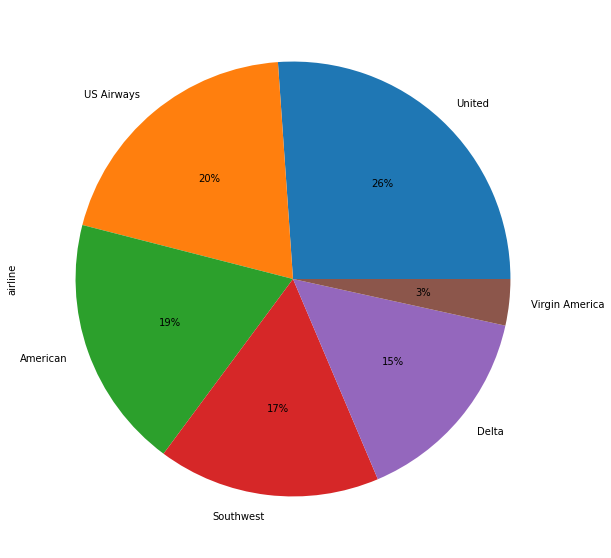

In [4]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
#Quantidade de tweets para cada empresa aerea.

### Vamos ver a distribuição de tweets positivo, negativo e neutro

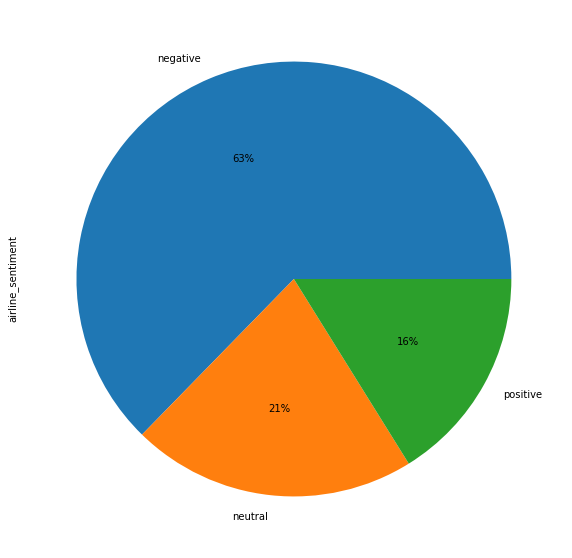

In [5]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

### Vamos observar agora para cada companhia area, como estar os tweets

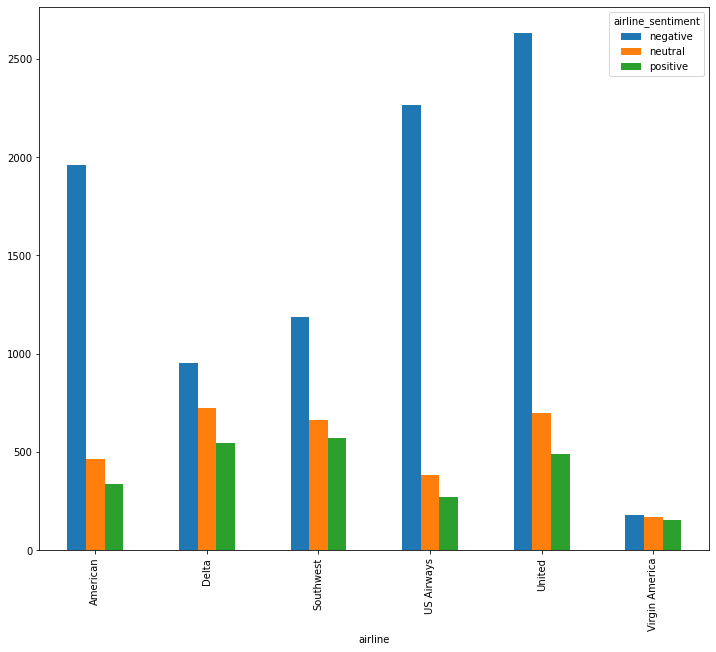

In [6]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

Percebe-se que "Virgin America" tem uma quantidade de tweets equilibrado. positivos, negativos e neutro.

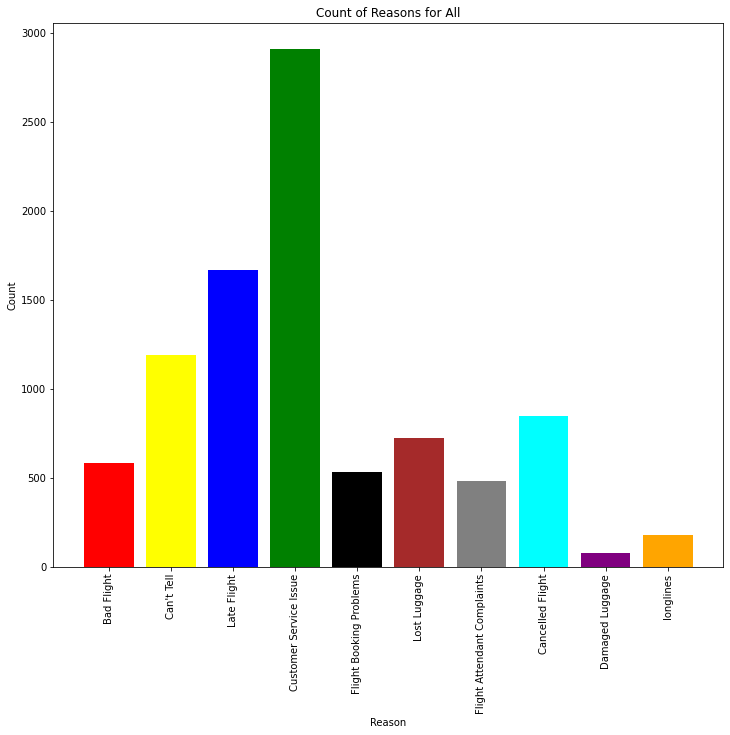

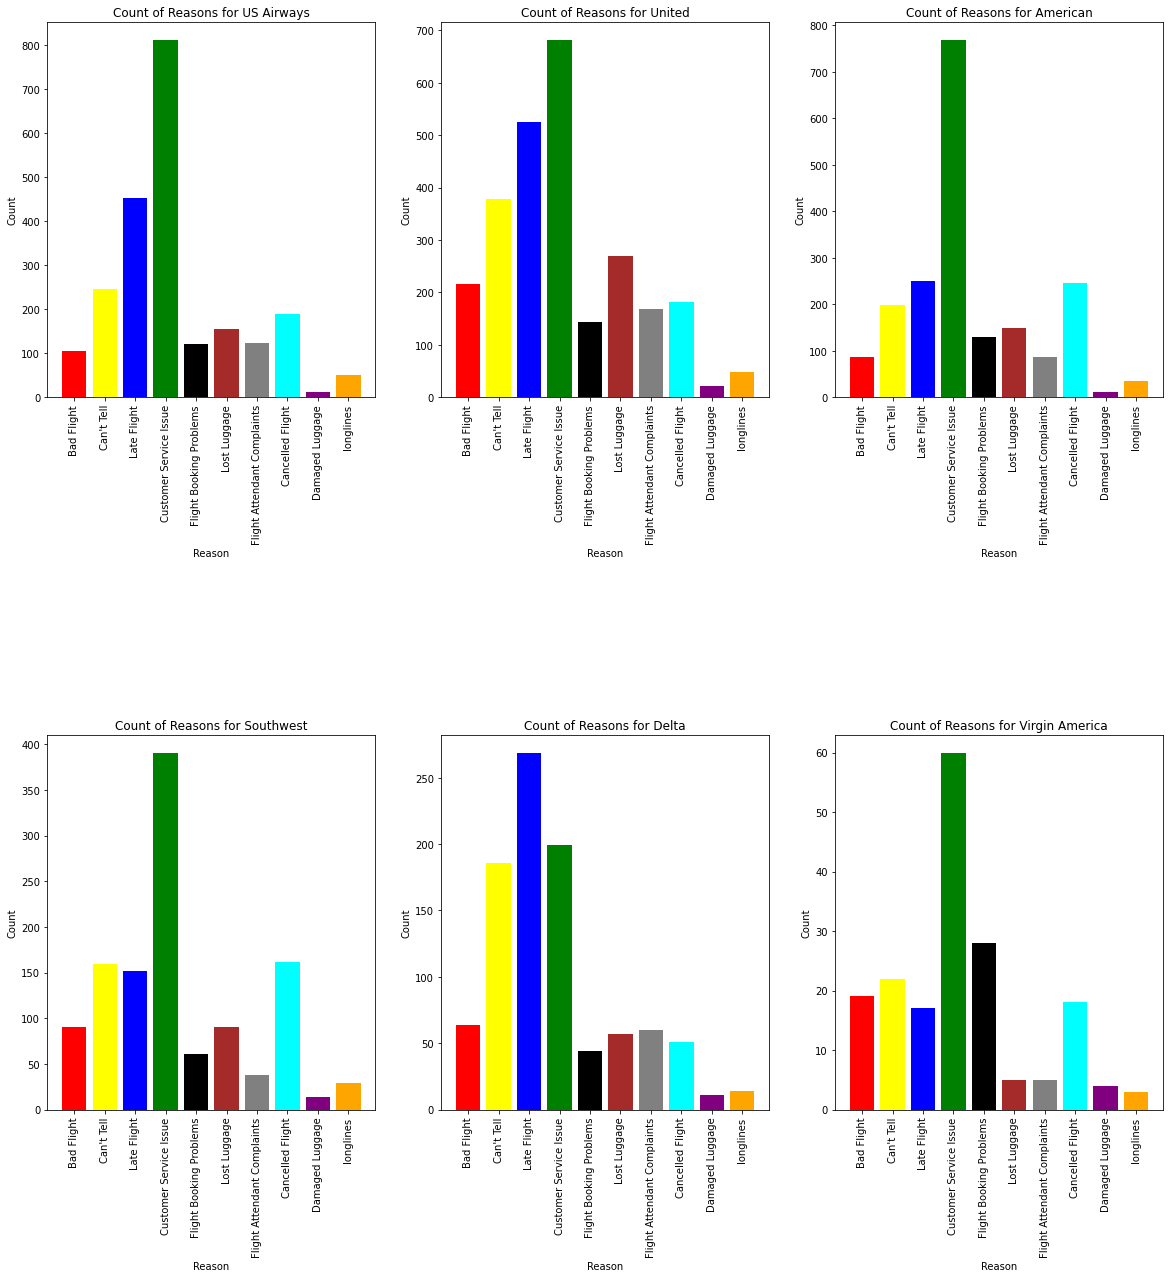

In [7]:
#get the number of negative reasons

airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

df = airline_tweets
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(20, 20))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


Percebe-se que "Virgin America" tem uma quantidade de tweets equilibrado. positivos, negativos e neutro.

[]

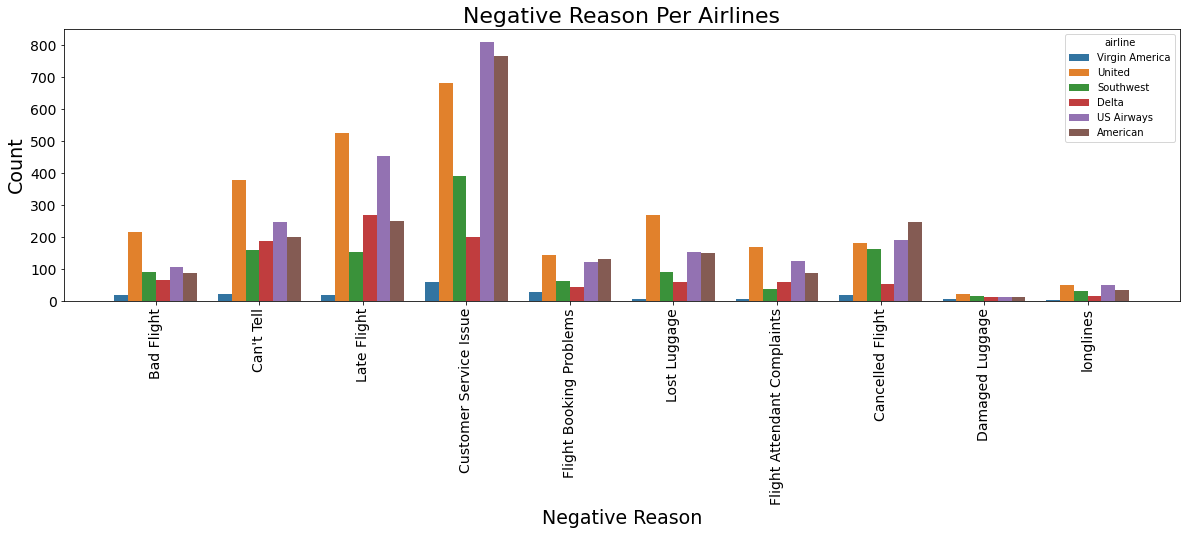

In [8]:
import seaborn as sns

figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Negative Reason"
ylabel = "Count"

title = "Negative Reason Per Airlines"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "negativereason"
col2 = "airline"
sns.countplot(x=airline_tweets[col1], hue=airline_tweets[col2])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

[]

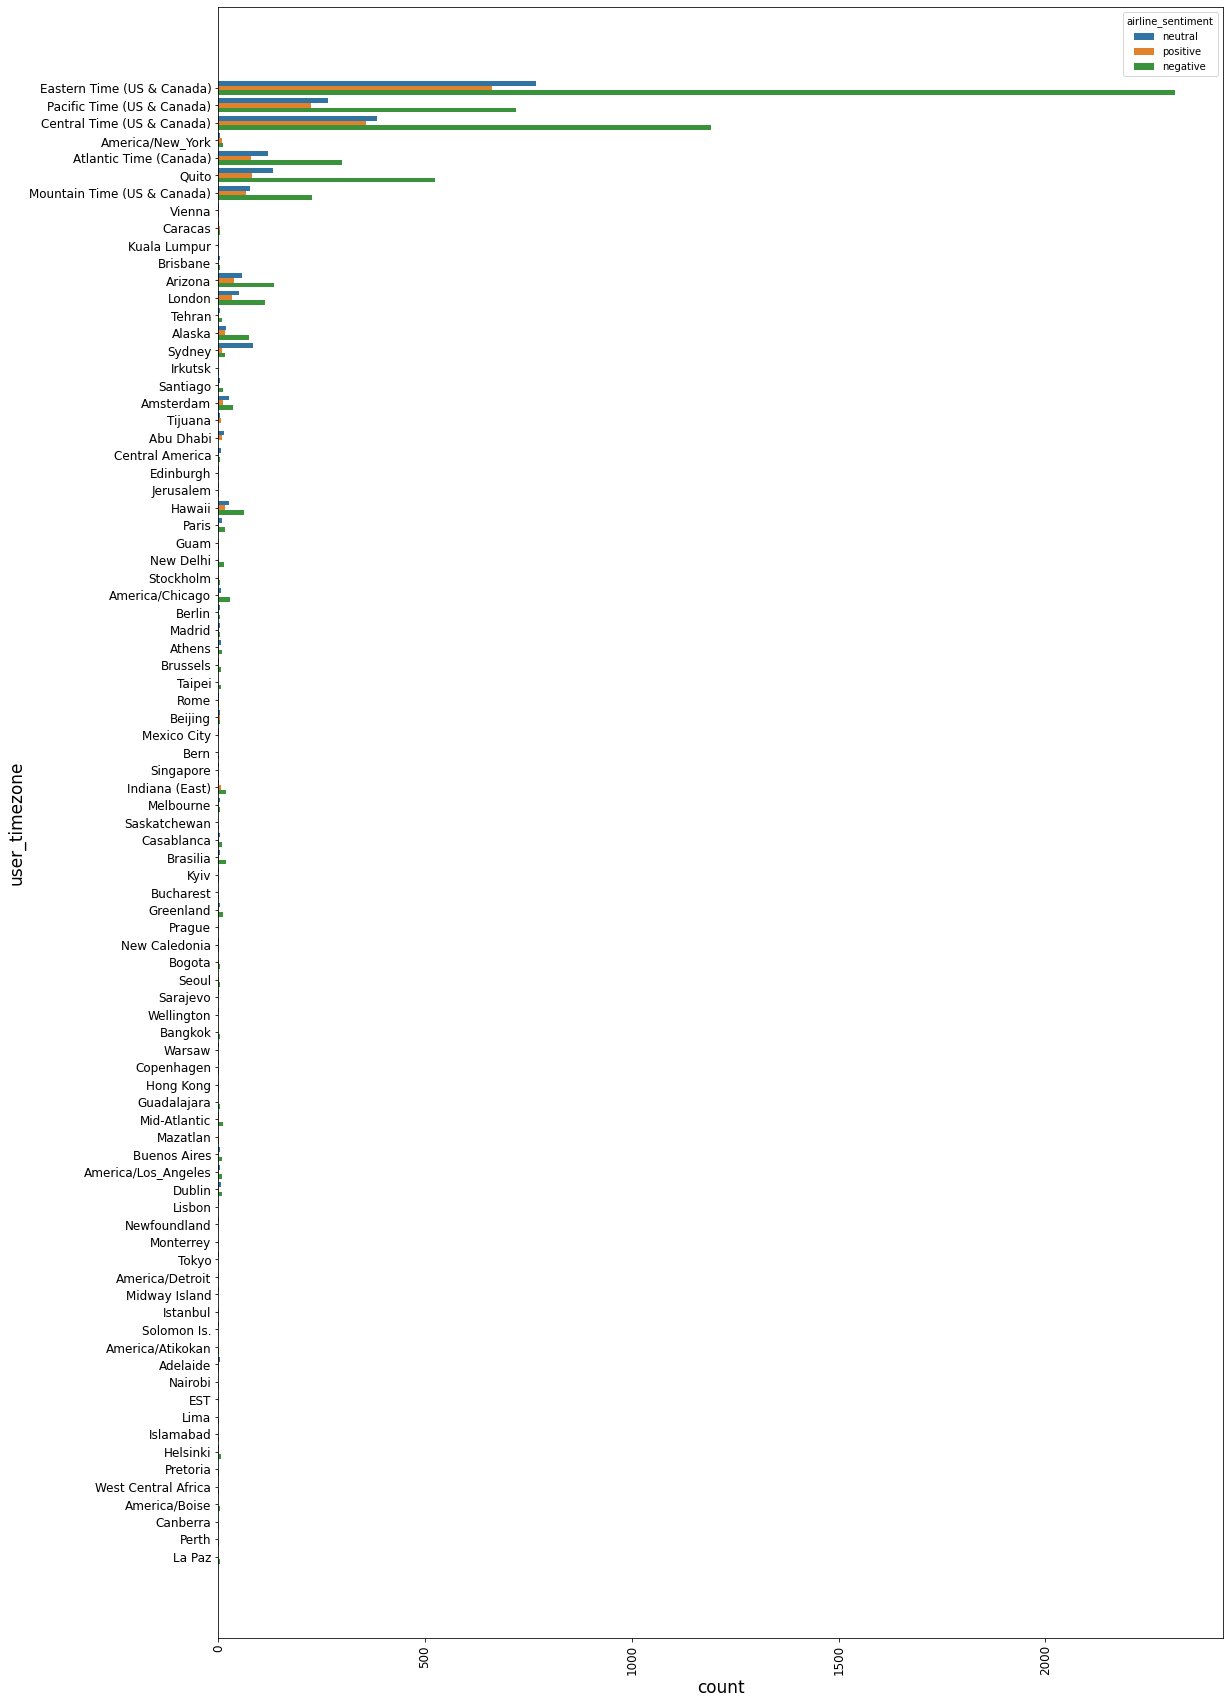

In [9]:
figsize=(18, 30)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col = "user_timezone"
col2 = "airline_sentiment"
sns.countplot(y=airline_tweets[col], hue=airline_tweets[col2])
plt.xticks(rotation=90)
plt.plot()

Precisamos Fazer um pre-processamento desse texto, para isso vamos tirar pontos, virgulas, underlines e etc.

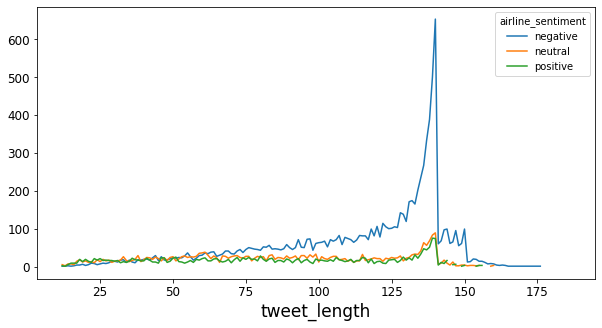

In [10]:
figsize=(10, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)
df['tweet_length'] = df['text'].apply(len)

df.groupby(['tweet_length', 'airline_sentiment']).size().unstack().plot(kind='line', stacked=False)


### vamos ver uma analise geral do modelo

In [11]:
#Esse comando é um overview de toda a base
#com alguns avisos de missing data
# não rodar
import pandas_profiling

pandas_profiling.ProfileReport(airline_tweets)

Precisamos Fazer um pre-processamento desse texto, para isso vamos tirar pontos, virgulas, underlines e etc.

In [12]:
features = airline_tweets.iloc[:, 10].values#Pegando os textos
labels = airline_tweets.iloc[:, 1].values#classes

In [13]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove todos os caracteres especiais
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remova todos os caracteres únicos
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remova caracteres únicos desde o início
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # substitui multiplos espaços
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to caixa baixa
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [14]:
#Doc1 = "I like to play football"
#Doc2 = "It is a good game"
#Doc3 = "I prefer football over rugby"

#feature vector

#Vocab = [I, like, to, play, football, it, is, a, good, game, prefer, over, rugby]
#[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
#nltk.download("stopwords")

In [16]:
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

processed_features = vectorizer.fit_transform(processed_features).toarray()

###### max_dffloat or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

###### min_dffloat or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

###### max_features int, default=None
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. This parameter is ignored if vocabulary is not None.

In [17]:
# separando o modelo em treino e text
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [18]:
from sklearn.model_selection import train_test_split

# Nessa situação, vamos separara train,test and validation.
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
Classifiers = [
    #LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),# eu nao variei esses parametros, pois eles travavam todo o processo.
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [23]:

Accuracy=[]
Confusion_matrix = []
Model=[]

Model_features = []


for classifier in Classifiers:
    try:
        fit = classifier.fit(X_train,y_train)
        pred = fit.predict(X_test)
        Model_features.append(classifier)
        
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
        Model_features.append(classifier)
    
    accuracy = accuracy_score(pred,y_test)
    results_matrix = confusion_matrix(pred, y_test) 
    Confusion_matrix.append(results_matrix)
    Accuracy.append(accuracy)

    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy*100))    

Accuracy of KNeighborsClassifier is 67.62295081967213
Accuracy of SVC is 64.9931693989071
Accuracy of DecisionTreeClassifier is 67.65710382513662
Accuracy of RandomForestClassifier is 75.75136612021858
Accuracy of AdaBoostClassifier is 71.44808743169399
Accuracy of GaussianNB is 41.46174863387978


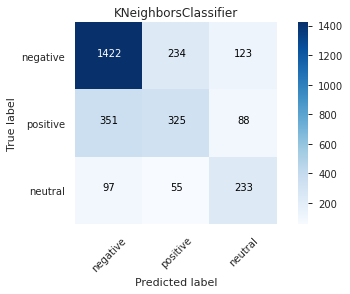

In [27]:
plot_confusion_matrix(Confusion_matrix[0], classes = ['negative','positive','neutral'],normalize=False,title = "KNeighborsClassifier") 

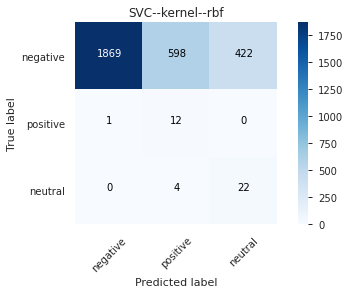

In [28]:
plot_confusion_matrix(Confusion_matrix[1], classes = ['negative','positive','neutral'],normalize=False,title = 'SVC--kernel--rbf') 

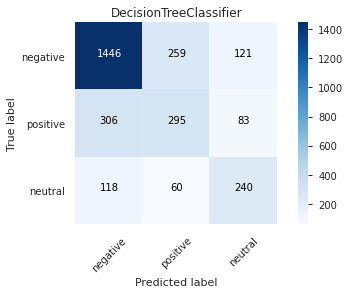

In [29]:
plot_confusion_matrix(Confusion_matrix[2], classes = ['negative','positive','neutral'],normalize=False,title = 'DecisionTreeClassifier') 

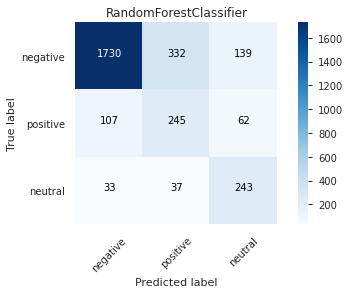

In [30]:
plot_confusion_matrix(Confusion_matrix[3], classes = ['negative','positive','neutral'],normalize=False,title = 'RandomForestClassifier') 

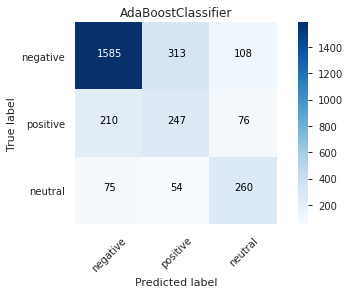

In [31]:
plot_confusion_matrix(Confusion_matrix[4], classes = ['negative','positive','neutral'],normalize=False,title = 'AdaBoostClassifier') 

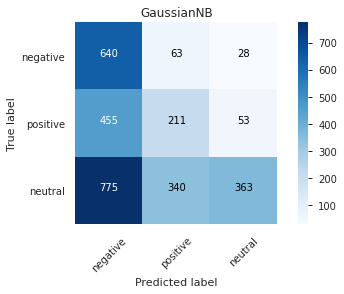

In [32]:
plot_confusion_matrix(Confusion_matrix[5], classes = ['negative','positive','neutral'],normalize=False,title = 'GaussianNB') 

### SVM 90%, Nessa situacao nos estamos dizendo que a classe positiva é igual positiva+neutra

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [34]:
data = pd.read_csv("Tweets.csv")

### Eliminando uma classe{neutral}.

In [35]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
data_clean = data.copy()
data_clean = data_clean[data_clean['airline_sentiment_confidence'] > 0.65]
data_clean['sentiment'] = data_clean['airline_sentiment'].\
    apply(lambda x: 1 if x=='negative' else 0)

data_clean['text_clean'] = data_clean['text'].apply(lambda x: BeautifulSoup(x, "lxml").text)

In [37]:
data_clean['sentiment'] = data_clean['airline_sentiment'].apply(lambda x: 1 if x=='negative' else 0)

In [38]:
data_clean = data_clean.loc[:, ['text_clean', 'sentiment']]

In [39]:
data_clean.head()

,text_clean,sentiment
0,@VirginAmerica What @dhepburn said.,0
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,1
4,@VirginAmerica and it's a really big bad thing...,1
5,@VirginAmerica seriously would pay $30 a fligh...,1


In [40]:
train, test = train_test_split(data_clean, test_size=0.2, random_state=1)
X_train = train['text_clean'].values
X_test = test['text_clean'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [41]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [42]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7faa33939670>,
                vocabulary=None)


In [43]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [44]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.2min finished


0.9188189903327683

In [45]:
grid_svm.best_params_

{'svc__C': 0.1}

In [46]:
grid_svm.best_score_

0.9026156572556101

In [47]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [48]:
#dar certo porque o problema e multiclasse.
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

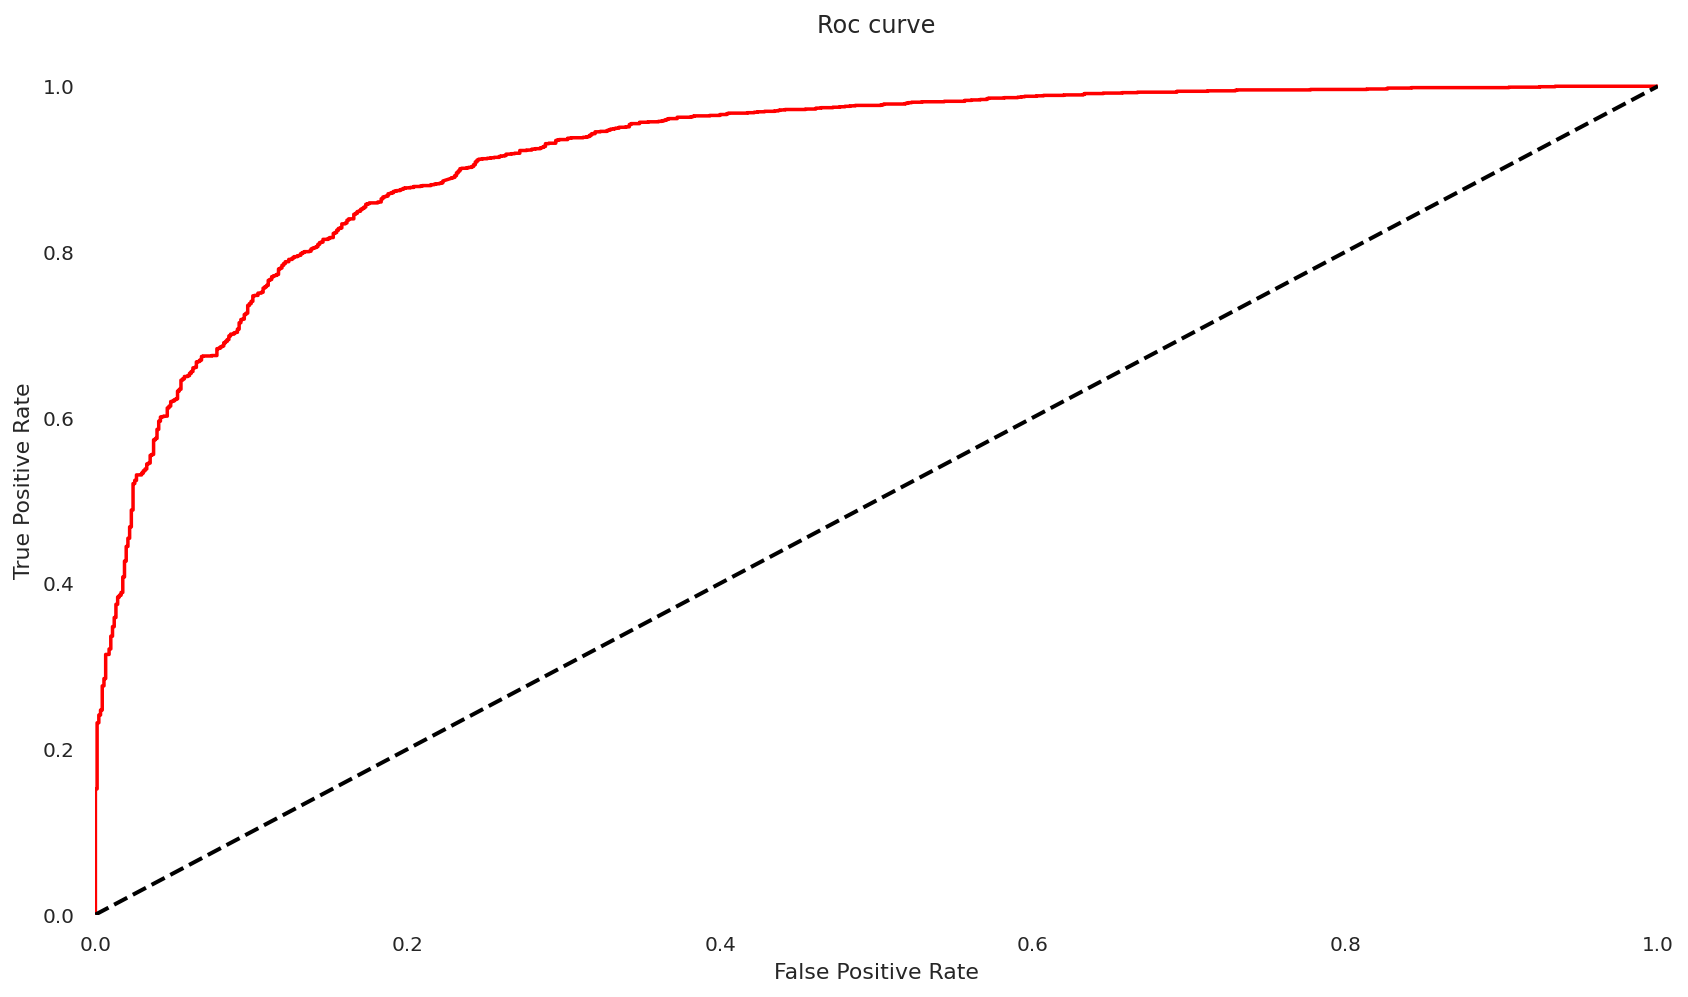

In [49]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

## Neural Network LSTM

In [82]:
import re
#import warnings

import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#warnings.filterwarnings("ignore", category=FutureWarning)

In [83]:
data = pd.read_csv("Tweets.csv")
df = data[["text","airline_sentiment"]]
df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))

<ipython-input-83-9af2131af9fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))


In [84]:
df.head()

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative


In [85]:
#df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

<ipython-input-85-0fab165c2a1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
<ipython-input-85-0fab165c2a1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only


In [86]:
df.head(5) #Quick Look 

,text,airline_sentiment
0,what dhepburn said,neutral
1,plus youve added commercials to the experienc...,positive
2,i didnt today must mean i need to take anothe...,neutral
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative


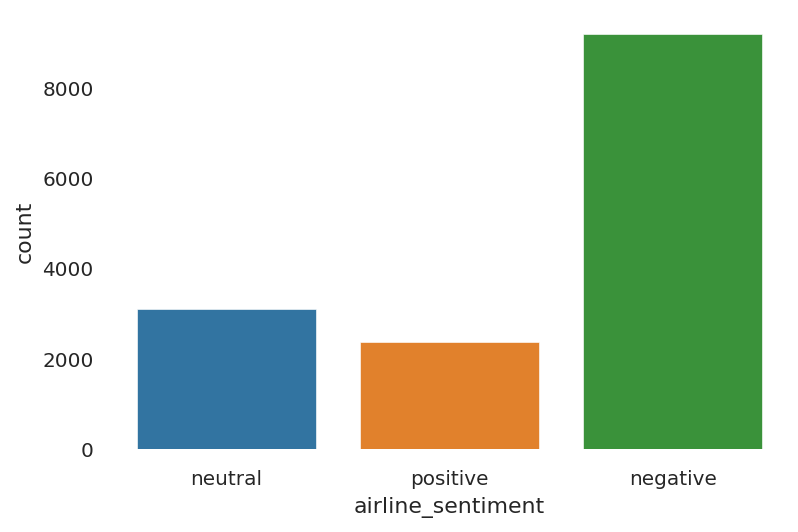

In [87]:
sns.countplot(df.airline_sentiment);#Mostly Negative Reviews(Class Imbalance found) 

In [88]:
max_fatures = 4000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = df['airline_sentiment']
L = Y.values

In [89]:
k = []
for i in range(len(L)):
    if L[i]=="negative":
                        k.append(0)
    if L[i]=="positive":
                        k.append(1)
    if L[i]=="neutral":
                        k.append(2)

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, k, 
                                                    test_size=0.2, 
                                                    shuffle = True,
                                                    stratify = k,
                                                    random_state = 1 )

In [91]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [92]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(200, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))


In [93]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [94]:
Model = model.fit(X_train,
                         Y_train,
                         epochs=20,
                         batch_size=40,
                         verbose = 2)

Epoch 1/20
293/293 - 22s - loss: 0.7757 - accuracy: 0.6703
Epoch 2/20
293/293 - 21s - loss: 0.5695 - accuracy: 0.7768
Epoch 3/20
293/293 - 21s - loss: 0.4821 - accuracy: 0.8203
Epoch 4/20
293/293 - 22s - loss: 0.4236 - accuracy: 0.8466
Epoch 5/20
293/293 - 23s - loss: 0.3746 - accuracy: 0.8650
Epoch 6/20
293/293 - 23s - loss: 0.3369 - accuracy: 0.8776
Epoch 7/20
293/293 - 23s - loss: 0.3027 - accuracy: 0.8935
Epoch 8/20
293/293 - 22s - loss: 0.2902 - accuracy: 0.8963
Epoch 9/20
293/293 - 21s - loss: 0.2654 - accuracy: 0.9017
Epoch 10/20
293/293 - 22s - loss: 0.2333 - accuracy: 0.9170
Epoch 11/20
293/293 - 22s - loss: 0.2226 - accuracy: 0.9244
Epoch 12/20
293/293 - 23s - loss: 0.2048 - accuracy: 0.9259
Epoch 13/20
293/293 - 23s - loss: 0.1947 - accuracy: 0.9319
Epoch 14/20
293/293 - 21s - loss: 0.1791 - accuracy: 0.9358
Epoch 15/20
293/293 - 22s - loss: 0.1798 - accuracy: 0.9372
Epoch 16/20
293/293 - 23s - loss: 0.1647 - accuracy: 0.9422
Epoch 17/20
293/293 - 23s - loss: 0.1562 - accura

In [95]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0]*100)
print("accuracy = ",score[1]*100)

loss =  115.33558368682861
accuracy =  76.36612057685852


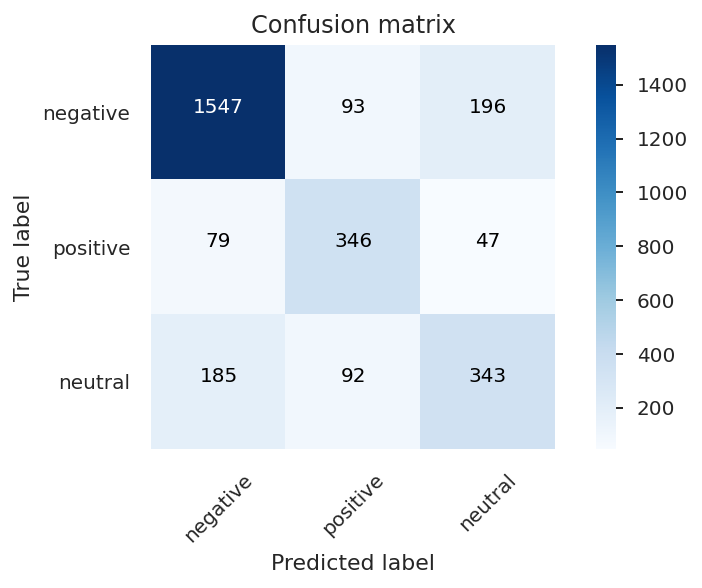

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['negative','positive','neutral']) 

In [97]:
confusion_mtx.shape

(3, 3)

In [98]:
sample = ['Meetings: Air crew is so dumb.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 1955  270  174
    11   40 2154]]
1/1 - 0s
negative


## Eliminando uma classe{neutral}.

#### Neural Network LSTM

In [67]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

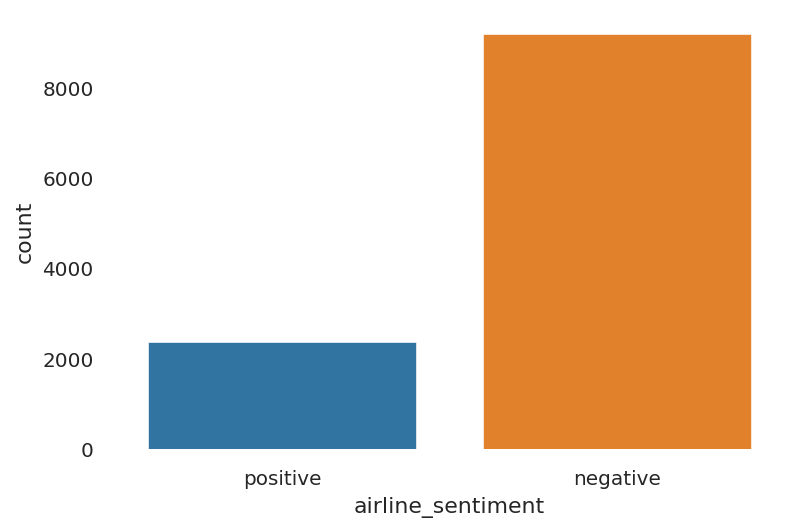

In [68]:
sns.countplot(df.airline_sentiment);#Mostly Negative Reviews(Class Imbalance found) 

In [69]:
max_fatures = 4000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = df['airline_sentiment']
L = Y.values

In [70]:
k = []
for i in range(len(L)):
    if L[i]=="negative":
                        k.append(0)
    if L[i]=="positive":
                        k.append(1)
    if L[i]=="neutral":
                        k.append(2)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, k, 
                                                    test_size=0.3, 
                                                    shuffle = True,
                                                    stratify = k,
                                                    random_state = 1 )

In [72]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [73]:
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(200, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))

In [74]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [75]:
Model = model.fit(X_train,
                         Y_train,
                         epochs=20,
                         batch_size=40,
                         verbose = 2)

Epoch 1/20
202/202 - 14s - loss: 0.3824 - accuracy: 0.8438
Epoch 2/20
202/202 - 15s - loss: 0.2107 - accuracy: 0.9221
Epoch 3/20
202/202 - 15s - loss: 0.1613 - accuracy: 0.9429
Epoch 4/20
202/202 - 15s - loss: 0.1215 - accuracy: 0.9564
Epoch 5/20
202/202 - 15s - loss: 0.0972 - accuracy: 0.9658
Epoch 6/20
202/202 - 15s - loss: 0.0686 - accuracy: 0.9751
Epoch 7/20
202/202 - 15s - loss: 0.0603 - accuracy: 0.9798
Epoch 8/20
202/202 - 15s - loss: 0.0545 - accuracy: 0.9806
Epoch 9/20
202/202 - 14s - loss: 0.0427 - accuracy: 0.9866
Epoch 10/20
202/202 - 15s - loss: 0.0399 - accuracy: 0.9861
Epoch 11/20
202/202 - 14s - loss: 0.0314 - accuracy: 0.9896
Epoch 12/20
202/202 - 14s - loss: 0.0334 - accuracy: 0.9900
Epoch 13/20
202/202 - 15s - loss: 0.0312 - accuracy: 0.9894
Epoch 14/20
202/202 - 15s - loss: 0.0269 - accuracy: 0.9918
Epoch 15/20
202/202 - 14s - loss: 0.0248 - accuracy: 0.9905
Epoch 16/20
202/202 - 14s - loss: 0.0201 - accuracy: 0.9927
Epoch 17/20
202/202 - 14s - loss: 0.0226 - accura

In [76]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0]*100)
print("accuracy = ",score[1]*100)

loss =  55.9337317943573
accuracy =  90.0952935218811


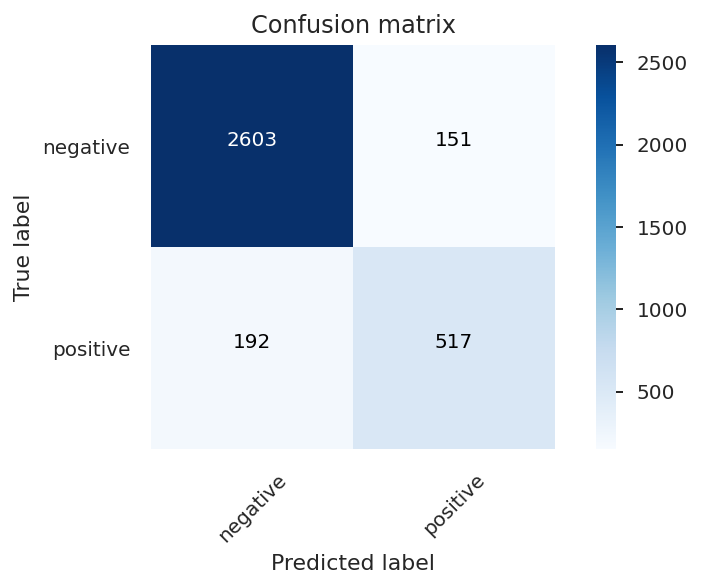

In [77]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = ['negative','positive']) 